In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inisiasi Data

In [2]:
import pandas as pd
df_beras = pd.read_excel('/content/drive/MyDrive/Kuliah/Kumpulan Karya Tulis   Esai/Lomba DM Satria Data 2024/SEC/Laboratorium/Data (sudah dibersihkan)/resampling + augmented data beras.xlsx')
df_iklim = pd.read_excel('/content/drive/MyDrive/Kuliah/Kumpulan Karya Tulis   Esai/Lomba DM Satria Data 2024/SEC/Laboratorium/Data (sudah dibersihkan)/resampling data iklim harian.xlsx')
df_iklim = df_iklim.drop(columns=['ddd_x', 'ddd_car'])
# mengset index Tanggal
df_beras = df_beras.set_index('Tanggal')
df_iklim = df_iklim.set_index('Tanggal')
print(df_beras.shape)
display(df_beras.head())
print(df_iklim.shape)
display(df_iklim.head())

(2525, 2)


Prov. Jawa Tengah  Kota Semarang
Tanggal                                     
2017-02-01             9993.0        10780.0
2017-02-02             9923.0        10780.0
2017-02-03             9950.0        10780.0
2017-02-04             9948.0        10780.0
2017-02-05             9946.0        10780.0

(2525, 8)


Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ff_avg
Tanggal                                                      
2017-02-01  25.0  30.8  26.2    86.0   4.0  5.3   6.0     4.0
2017-02-02  23.8  29.2  25.7    87.0  24.0  0.8   5.0     3.0
2017-02-03  23.0  30.2  26.1    85.0  17.0  2.3   5.0     3.0
2017-02-04  23.2  30.8  27.4    82.0  23.0  4.2   7.0     4.0
2017-02-05  24.2  31.2  27.3    84.0  11.0  5.7   5.0     4.0

In [3]:
print(df_beras.info())
print(df_iklim.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2017-02-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prov. Jawa Tengah  2525 non-null   float64
 1   Kota Semarang      2525 non-null   float64
dtypes: float64(2)
memory usage: 59.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2017-02-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      2525 non-null   float64
 1   Tx      2525 non-null   float64
 2   Tavg    2525 non-null   float64
 3   RH_avg  2525 non-null   float64
 4   RR      2525 non-null   float64
 5   ss      2525 non-null   float64
 6   ff_x    2525 non-null   float64
 7   ff_avg  2525 non-null   float64
dtypes: float64(8)
memory usage: 177.5 KB
None


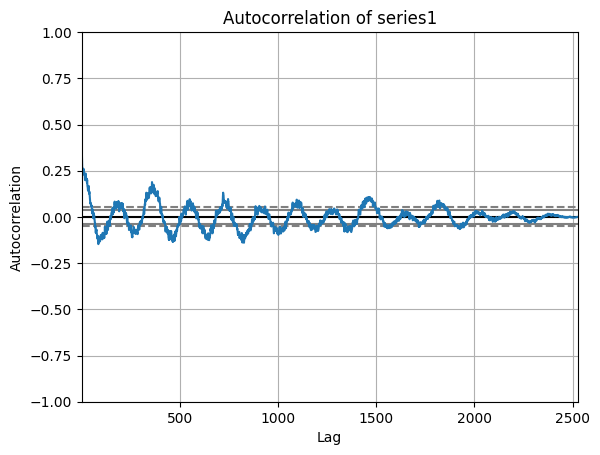

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
# Plot autocorrelation untuk series1
autocorrelation_plot(df_iklim['Tn'])
plt.title('Autocorrelation of series1')
plt.show()

In [5]:
df_beras_cols = df_beras.columns.tolist()
df_iklim_cols = df_iklim.columns.tolist()
print(df_beras_cols)
print(df_iklim_cols)

['Prov. Jawa Tengah', 'Kota Semarang']
['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']


# Pearson Correlation

Harga beras: Prov. Jawa Tengah - Satuan: Tn
	 Korelasi Pearson: 0.018774084422840422, p-value: 0.34567985797084505
Harga beras: Prov. Jawa Tengah - Satuan: Tx
	 Korelasi Pearson: 0.12091475665153915, p-value: 1.0926108012243293e-09
Harga beras: Prov. Jawa Tengah - Satuan: Tavg
	 Korelasi Pearson: 0.18904084924030776, p-value: 9.611758075774259e-22
Harga beras: Prov. Jawa Tengah - Satuan: RH_avg
	 Korelasi Pearson: -0.08628161572474949, p-value: 1.414818624997084e-05
Harga beras: Prov. Jawa Tengah - Satuan: RR
	 Korelasi Pearson: 0.014535632985664532, p-value: 0.4653391979411854
Harga beras: Prov. Jawa Tengah - Satuan: ss
	 Korelasi Pearson: 0.04021349387304038, p-value: 0.04332950327432585
Harga beras: Prov. Jawa Tengah - Satuan: ff_x
	 Korelasi Pearson: -0.1305894745863429, p-value: 4.487550955085649e-11
Harga beras: Prov. Jawa Tengah - Satuan: ff_avg
	 Korelasi Pearson: -0.07320793504575406, p-value: 0.00023161795911364846
Harga beras: Kota Semarang - Satuan: Tn
	 Korelasi Pearson: 0

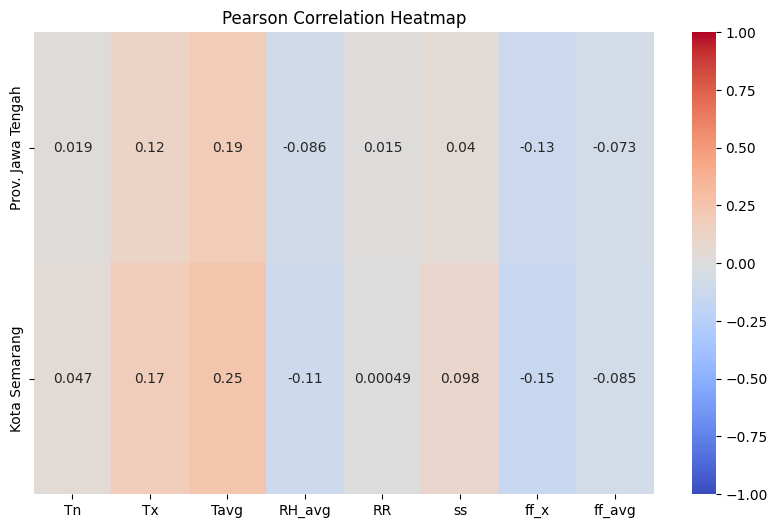

In [ ]:
from scipy.stats import pearsonr
df_beras_cols = df_beras.columns.tolist()
df_iklim_cols = df_iklim.columns.tolist()
# Membuat matriks untuk menyimpan hasil korelasi Pearson
correlation_matrix = pd.DataFrame(index=df_beras.columns, columns=df_iklim.columns, dtype=float)

# Menghitung korelasi Pearson antara dua time series
for beras in df_beras_cols:
  for iklim in df_iklim_cols:
    print(f"Harga beras: {beras} - Satuan: {iklim}")
    corr, p_value = pearsonr(df_beras[beras], df_iklim[iklim])
    print(f'\t Korelasi Pearson: {corr}, p-value: {p_value}')
    correlation_matrix.loc[beras, iklim] = corr

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

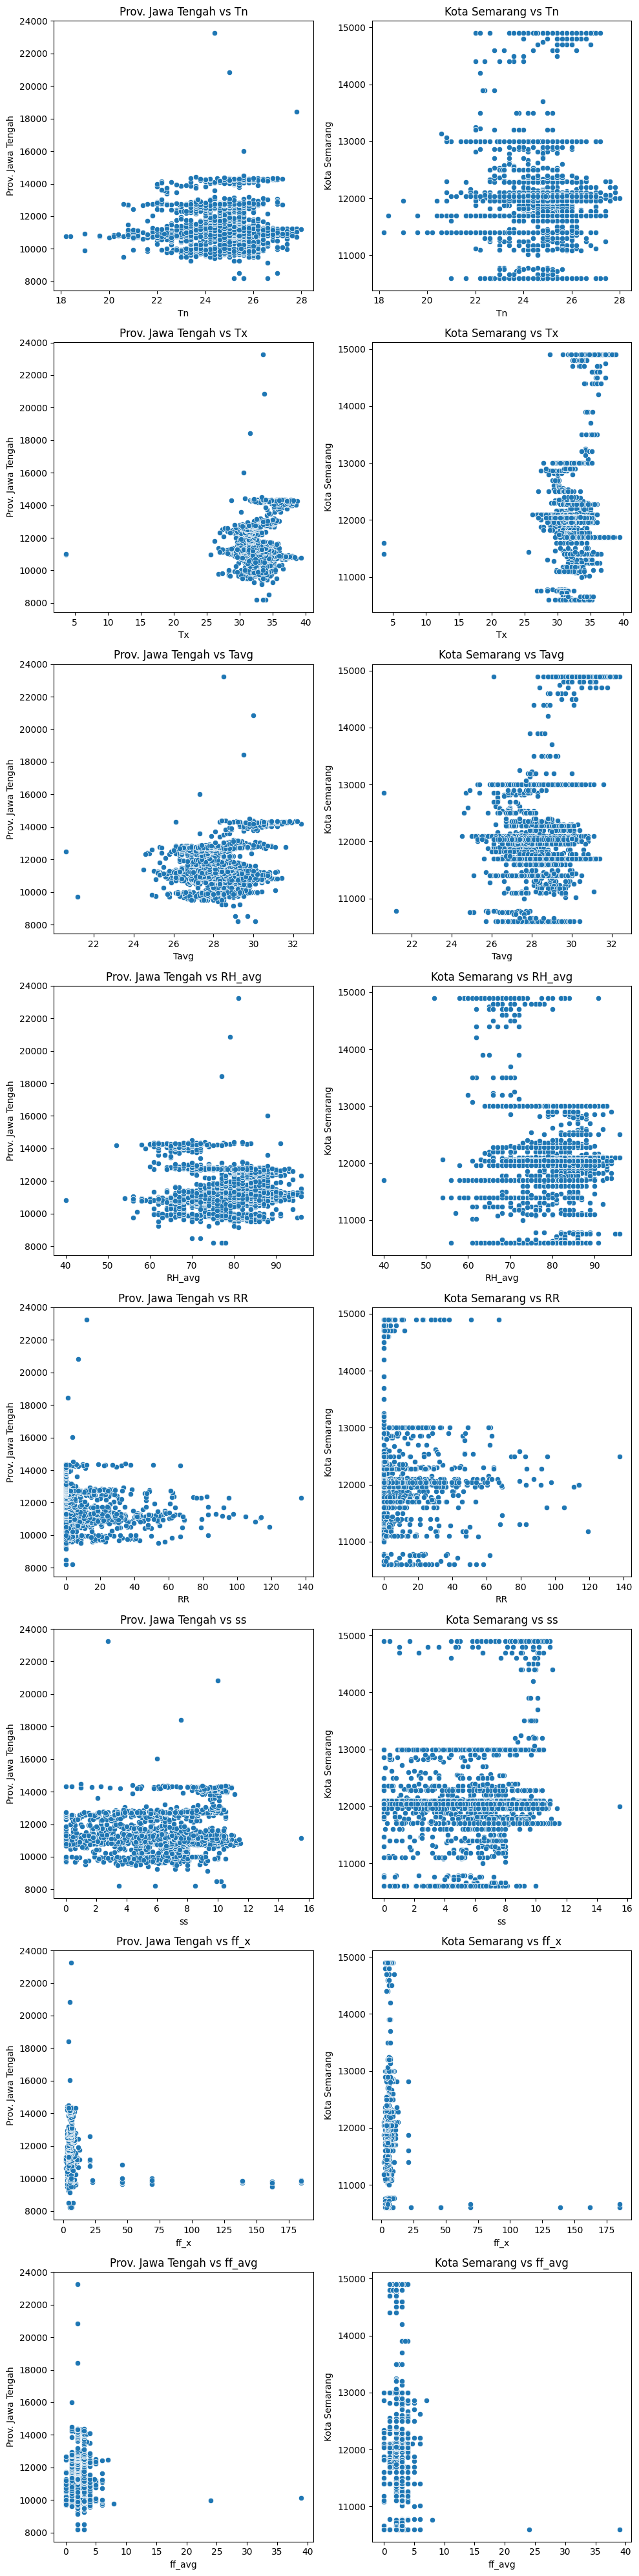

In [ ]:
# Plotting scatter plots
num_cols = len(df_beras_cols)
num_rows = len(df_iklim_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

for i, beras in enumerate(df_beras_cols):
    for j, iklim in enumerate(df_iklim_cols):
        ax = axes[j, i] if num_cols > 1 and num_rows > 1 else axes
        sns.scatterplot(x=df_iklim[iklim], y=df_beras[beras], ax=ax)
        ax.set_title(f'{beras} vs {iklim}')
        ax.set_xlabel(iklim)
        ax.set_ylabel(beras)

plt.tight_layout()
plt.show()

# Spearman Correlation

Harga beras: Prov. Jawa Tengah - Satuan: Tn
	 Korelasi Spearman: 0.021058269129878092, p-value: 0.29016567155116285
Harga beras: Prov. Jawa Tengah - Satuan: Tx
	 Korelasi Spearman: -0.08962532308115714, p-value: 6.468532539234888e-06
Harga beras: Prov. Jawa Tengah - Satuan: Tavg
	 Korelasi Spearman: 0.011703175427173956, p-value: 0.5566623672689011
Harga beras: Prov. Jawa Tengah - Satuan: RH_avg
	 Korelasi Spearman: 0.13787281470481713, p-value: 3.455188229773752e-12
Harga beras: Prov. Jawa Tengah - Satuan: RR
	 Korelasi Spearman: 0.12499489095379838, p-value: 2.928132137400879e-10
Harga beras: Prov. Jawa Tengah - Satuan: ss
	 Korelasi Spearman: -0.05315732851893482, p-value: 0.0075470551838499505
Harga beras: Prov. Jawa Tengah - Satuan: ff_x
	 Korelasi Spearman: 0.02136191873312256, p-value: 0.2832648142114054
Harga beras: Prov. Jawa Tengah - Satuan: ff_avg
	 Korelasi Spearman: -0.1241586717533774, p-value: 3.8487336478174915e-10
Harga beras: Kota Semarang - Satuan: Tn
	 Korelasi Spea

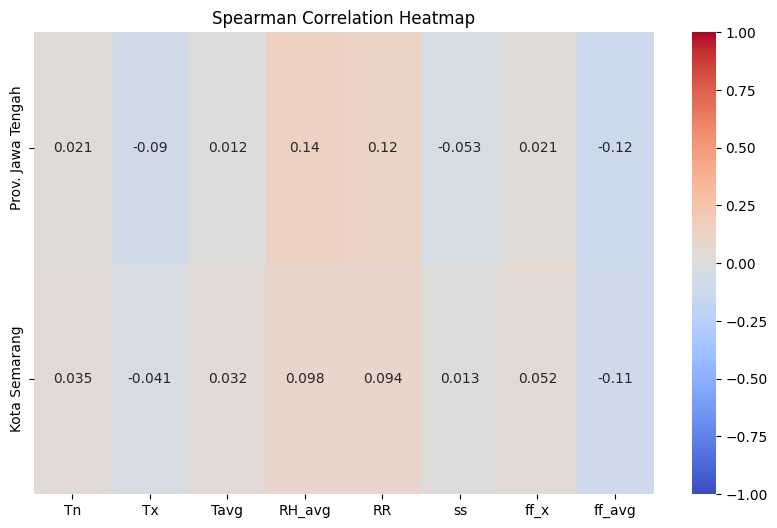

In [7]:
from scipy.stats import spearmanr

# Membuat matriks untuk menyimpan hasil korelasi Spearman
correlation_matrix = pd.DataFrame(index=df_beras.columns, columns=df_iklim.columns, dtype=float)

# Menghitung korelasi Spearman antara dua time series
for beras in df_beras_cols:
  for iklim in df_iklim_cols:
    print(f"Harga beras: {beras} - Satuan: {iklim}")
    corr, p_value = spearmanr(df_beras[beras], df_iklim[iklim])
    print(f'\t Korelasi Spearman: {corr}, p-value: {p_value}')
    correlation_matrix.loc[beras, iklim] = corr

# Plotting Spearman
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()

# Cross Correlation

Harga beras: Prov. Jawa Tengah - Satuan: Tn
	 Cross-correlation maksimum: 390353.292904685 pada lag 1106
Harga beras: Prov. Jawa Tengah - Satuan: Tx
	 Cross-correlation maksimum: 1228286.1364784278 pada lag -205
Harga beras: Prov. Jawa Tengah - Satuan: Tavg
	 Cross-correlation maksimum: 622563.1132785805 pada lag -255
Harga beras: Prov. Jawa Tengah - Satuan: RH_avg
	 Cross-correlation maksimum: 5545776.41835049 pada lag 1013
Harga beras: Prov. Jawa Tengah - Satuan: RR
	 Cross-correlation maksimum: 4465857.8036177205 pada lag -794
Harga beras: Prov. Jawa Tengah - Satuan: ss
	 Cross-correlation maksimum: 1431280.7492804423 pada lag -194
Harga beras: Prov. Jawa Tengah - Satuan: ff_x
	 Cross-correlation maksimum: 8771027.402768156 pada lag 2282
Harga beras: Prov. Jawa Tengah - Satuan: ff_avg
	 Cross-correlation maksimum: 463160.6949214942 pada lag 2044
Harga beras: Kota Semarang - Satuan: Tn
	 Cross-correlation maksimum: 266629.9553283261 pada lag 914
Harga beras: Kota Semarang - Satuan: T

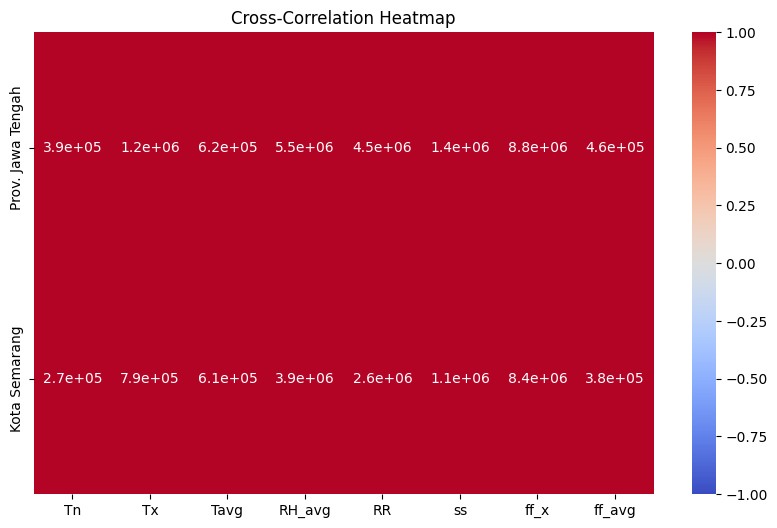

In [ ]:
# Membuat matriks untuk menyimpan hasil cross-correlation
correlation_matrix = pd.DataFrame(index=df_beras_cols, columns=df_iklim_cols, dtype=float)

# Menghitung cross-correlation antara dua time series
for beras in df_beras_cols:
    for iklim in df_iklim_cols:
        print(f"Harga beras: {beras} - Satuan: {iklim}")

        # Normalisasi data sebelum cross-correlation
        series1 = df_beras[beras] - np.mean(df_beras[beras])
        series2 = df_iklim[iklim] - np.mean(df_iklim[iklim])

        # Menghitung cross-correlation
        cross_corr = np.correlate(series1, series2, mode='full')

        # Mengambil nilai cross-correlation maksimum
        max_corr = cross_corr.max()
        max_corr_index = np.argmax(cross_corr) - len(series1) + 1  # Menyesuaikan indeks lag

        print(f'\t Cross-correlation maksimum: {max_corr} pada lag {max_corr_index}')
        correlation_matrix.loc[beras, iklim] = max_corr

# Plotting Cross-Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cross-Correlation Heatmap')
plt.show()

Harga beras: Prov. Jawa Tengah - Satuan: Tn
	 Cross-correlation maksimum: 390353.292904685 pada lag 1106
	 Cross-correlation minimum: -452579.84093945933 pada lag 1543
Harga beras: Prov. Jawa Tengah - Satuan: Tx
	 Cross-correlation maksimum: 1228286.1364784278 pada lag -205
	 Cross-correlation minimum: -878287.5159531231 pada lag 998
Harga beras: Prov. Jawa Tengah - Satuan: Tavg
	 Cross-correlation maksimum: 622563.1132785805 pada lag -255
	 Cross-correlation minimum: -878287.5159531231 pada lag 998
Harga beras: Prov. Jawa Tengah - Satuan: RH_avg
	 Cross-correlation maksimum: 5545776.41835049 pada lag 1013
	 Cross-correlation minimum: -4945222.289034752 pada lag -219
Harga beras: Prov. Jawa Tengah - Satuan: RR
	 Cross-correlation maksimum: 4465857.8036177205 pada lag -794
	 Cross-correlation minimum: -4945222.289034752 pada lag -219
Harga beras: Prov. Jawa Tengah - Satuan: ss
	 Cross-correlation maksimum: 1431280.7492804423 pada lag -194
	 Cross-correlation minimum: -4945222.289034752 

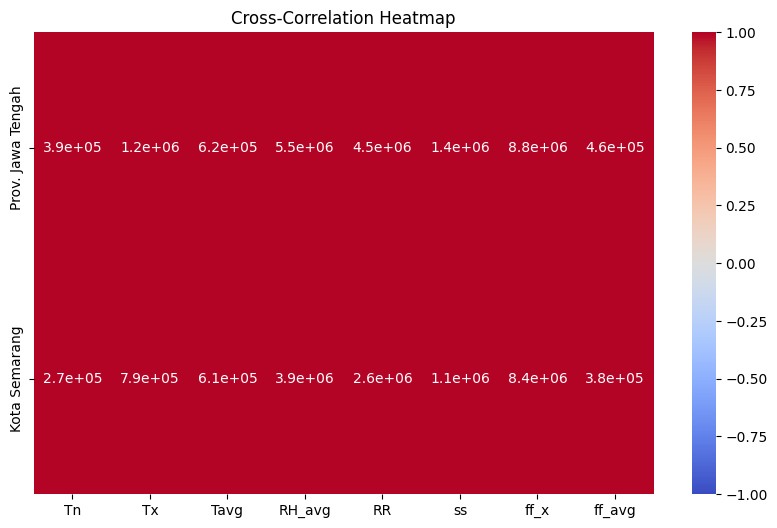

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat matriks untuk menyimpan hasil cross-correlation
correlation_matrix = pd.DataFrame(index=df_beras_cols, columns=df_iklim_cols, dtype=float)
min_corr = 1  # Initial value for minimum cross-correlation
min_corr_lag = None  # Initial value for lag of minimum cross-correlation

# Menghitung cross-correlation antara dua time series
for beras in df_beras_cols:
    for iklim in df_iklim_cols:
        print(f"Harga beras: {beras} - Satuan: {iklim}")

        # Normalisasi data sebelum cross-correlation
        series1 = df_beras[beras] - np.mean(df_beras[beras])
        series2 = df_iklim[iklim] - np.mean(df_iklim[iklim])

        # Menghitung cross-correlation
        cross_corr = np.correlate(series1, series2, mode='full')

        # Mengambil nilai cross-correlation maksimum
        max_corr = cross_corr.max()
        max_corr_index = np.argmax(cross_corr) - len(series1) + 1  # Menyesuaikan indeks lag

        # Mengambil nilai cross-correlation minimum
        curr_min_corr = cross_corr.min()
        if curr_min_corr < min_corr:
            min_corr = curr_min_corr
            min_corr_lag = np.argmin(cross_corr) - len(series1) + 1  # Menyesuaikan indeks lag

        print(f'\t Cross-correlation maksimum: {max_corr} pada lag {max_corr_index}')
        print(f'\t Cross-correlation minimum: {min_corr} pada lag {min_corr_lag}')
        correlation_matrix.loc[beras, iklim] = max_corr

# Plotting Cross-Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cross-Correlation Heatmap')

# Menampilkan nilai minimum cross-correlation
print(f'Nilai minimum cross-correlation: {min_corr} pada lag {min_corr_lag}')
plt.show()


Harga beras: Prov. Jawa Tengah - Satuan: Tn
	 Cross-correlation maksimum: 390353.292904685 pada lag 1106


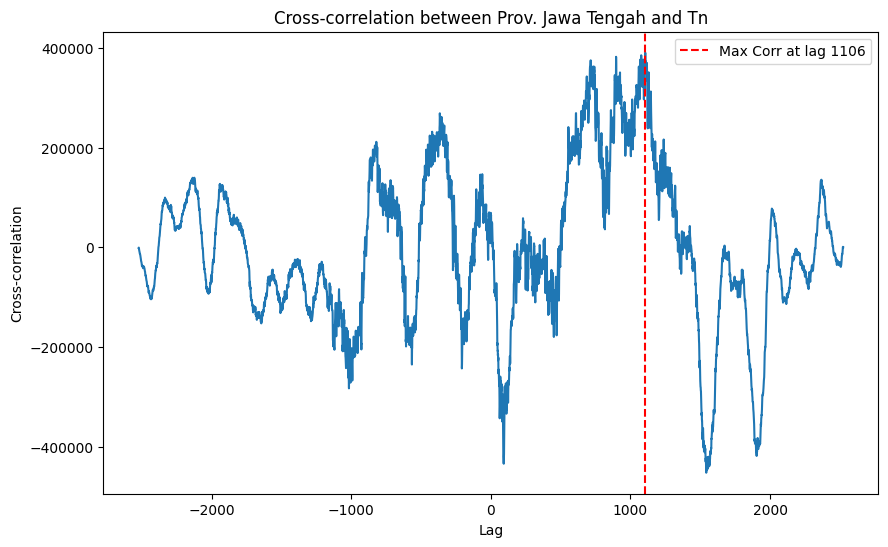

Harga beras: Prov. Jawa Tengah - Satuan: Tx
	 Cross-correlation maksimum: 1228286.1364784278 pada lag -205


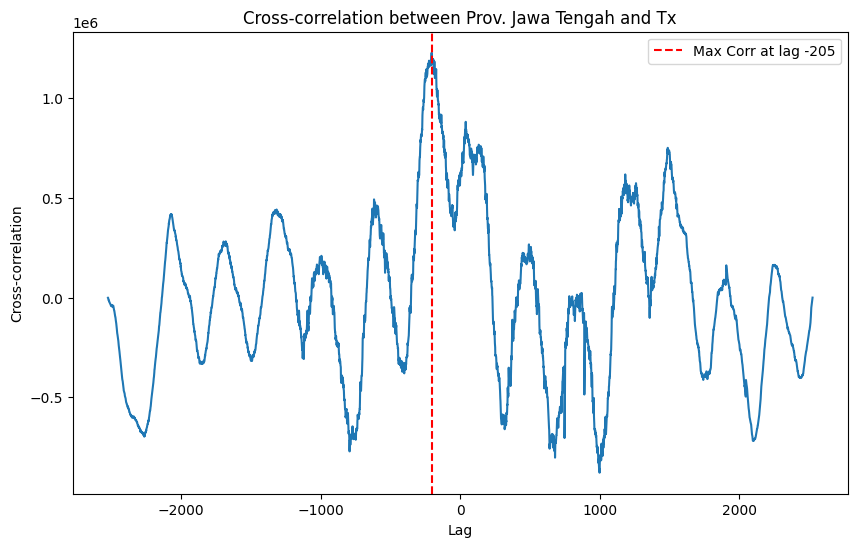

Harga beras: Prov. Jawa Tengah - Satuan: Tavg
	 Cross-correlation maksimum: 622563.1132785805 pada lag -255


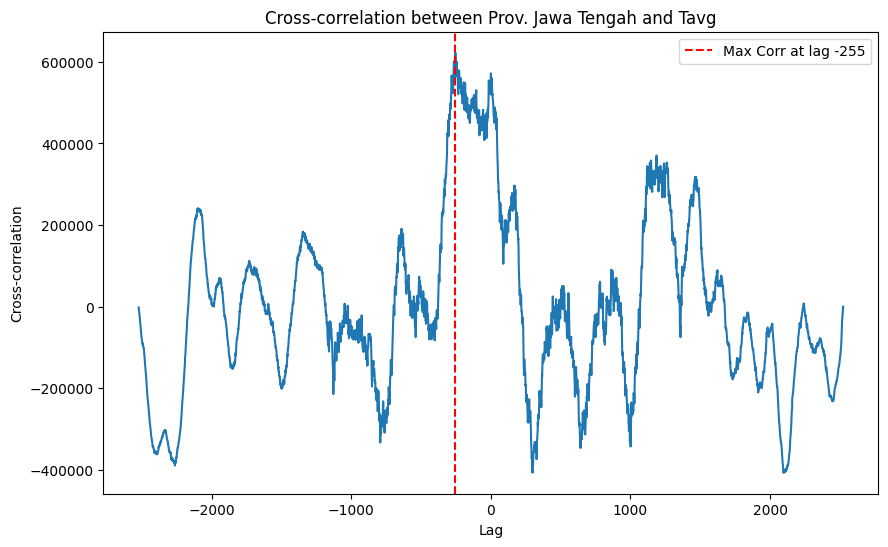

Harga beras: Prov. Jawa Tengah - Satuan: RH_avg
	 Cross-correlation maksimum: 5545776.41835049 pada lag 1013


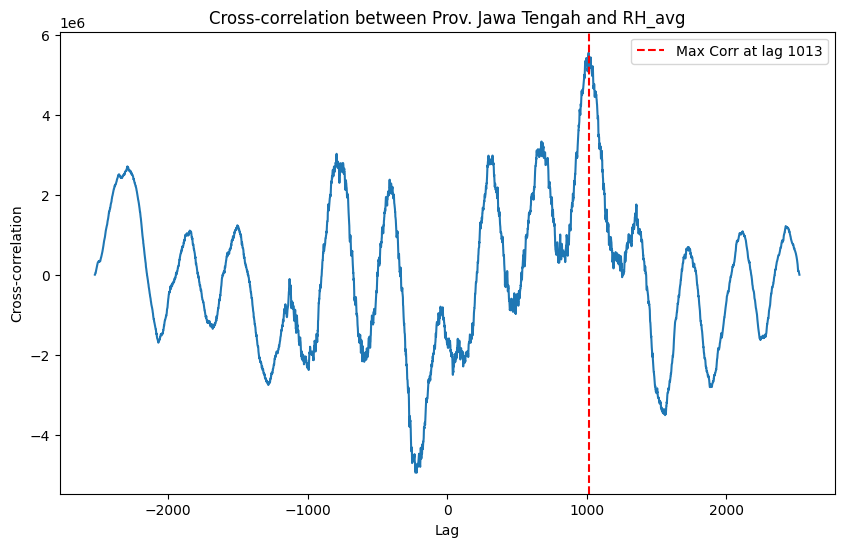

Harga beras: Prov. Jawa Tengah - Satuan: RR
	 Cross-correlation maksimum: 4465857.8036177205 pada lag -794


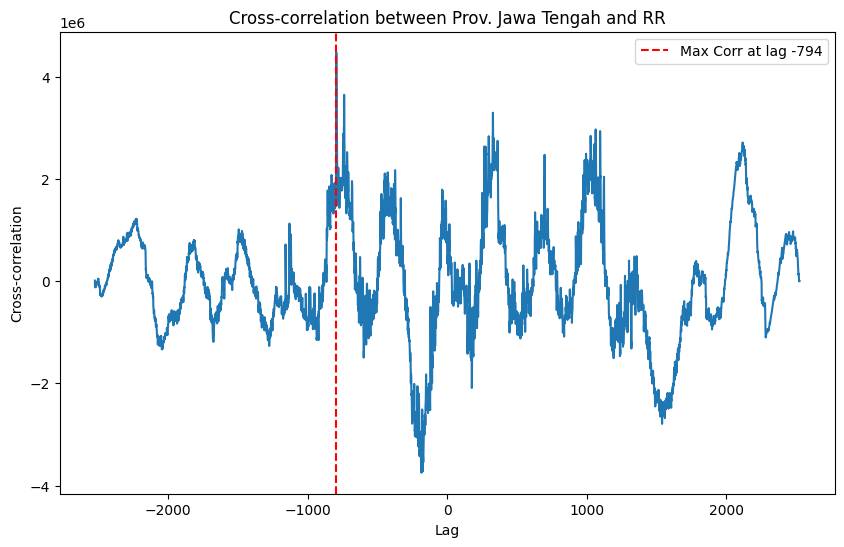

Harga beras: Prov. Jawa Tengah - Satuan: ss
	 Cross-correlation maksimum: 1431280.7492804423 pada lag -194


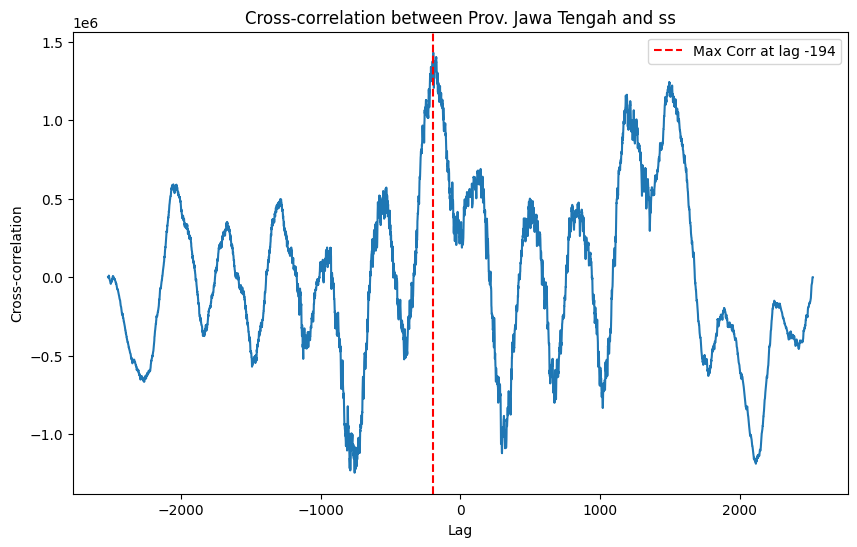

Harga beras: Prov. Jawa Tengah - Satuan: ff_x
	 Cross-correlation maksimum: 8771027.402768156 pada lag 2282


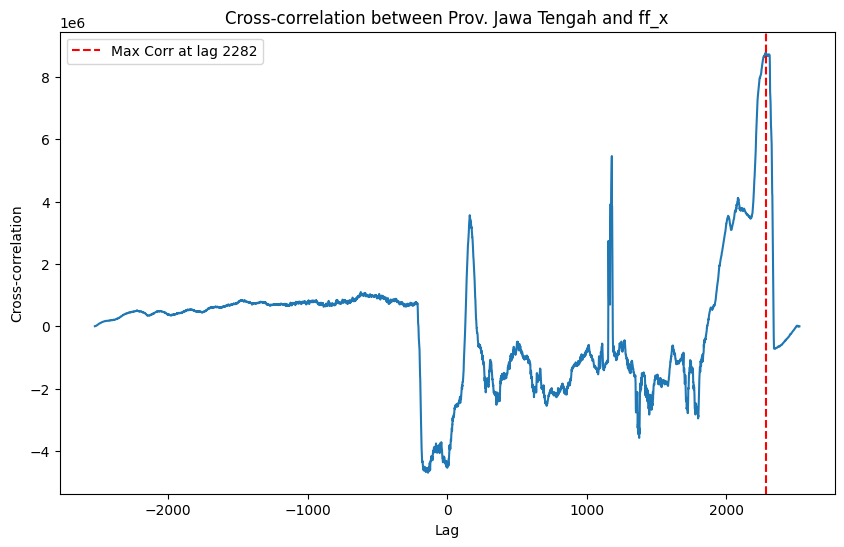

Harga beras: Prov. Jawa Tengah - Satuan: ff_avg
	 Cross-correlation maksimum: 463160.6949214942 pada lag 2044


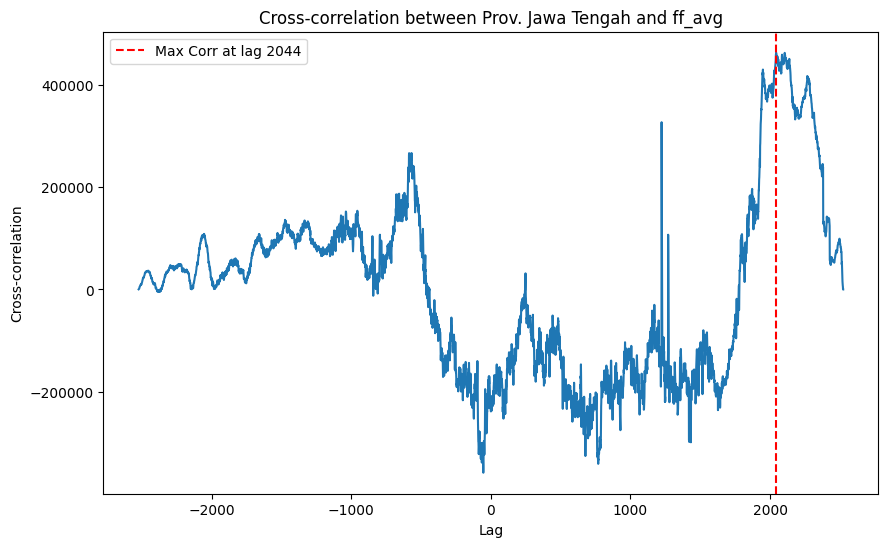

Harga beras: Kota Semarang - Satuan: Tn
	 Cross-correlation maksimum: 266629.9553283261 pada lag 914


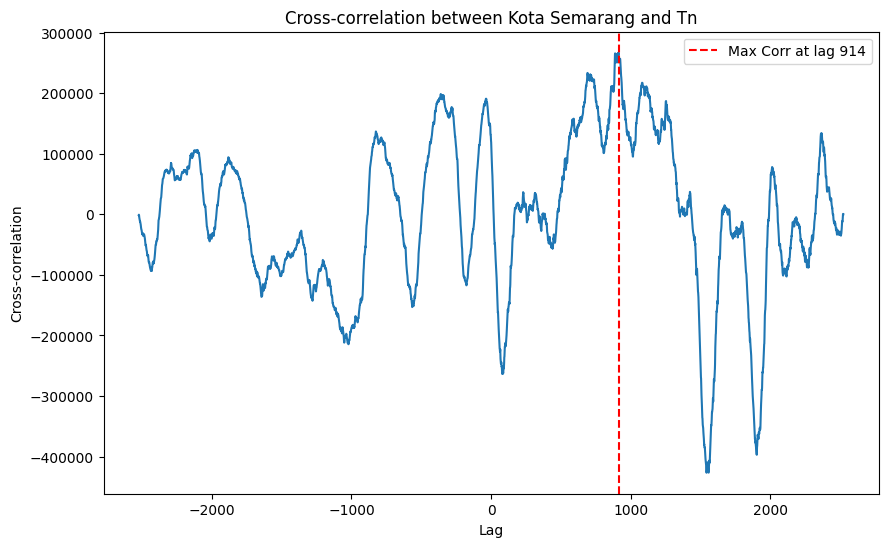

Harga beras: Kota Semarang - Satuan: Tx
	 Cross-correlation maksimum: 793214.8047401466 pada lag -210


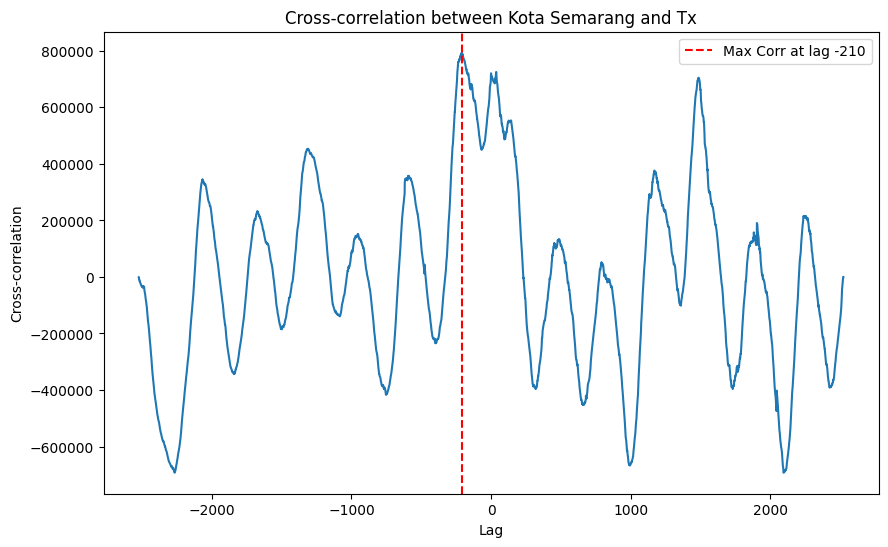

Harga beras: Kota Semarang - Satuan: Tavg
	 Cross-correlation maksimum: 609591.4339364971 pada lag -7


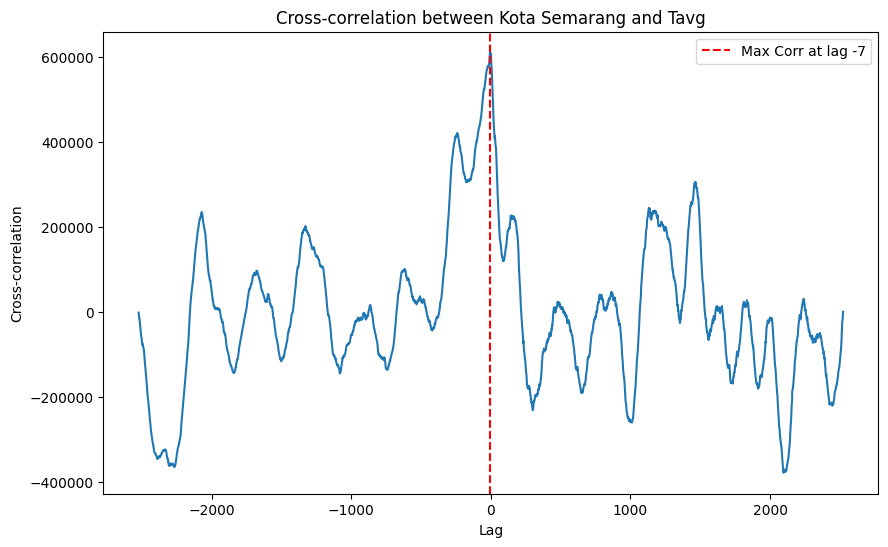

Harga beras: Kota Semarang - Satuan: RH_avg
	 Cross-correlation maksimum: 3918879.340417664 pada lag 1001


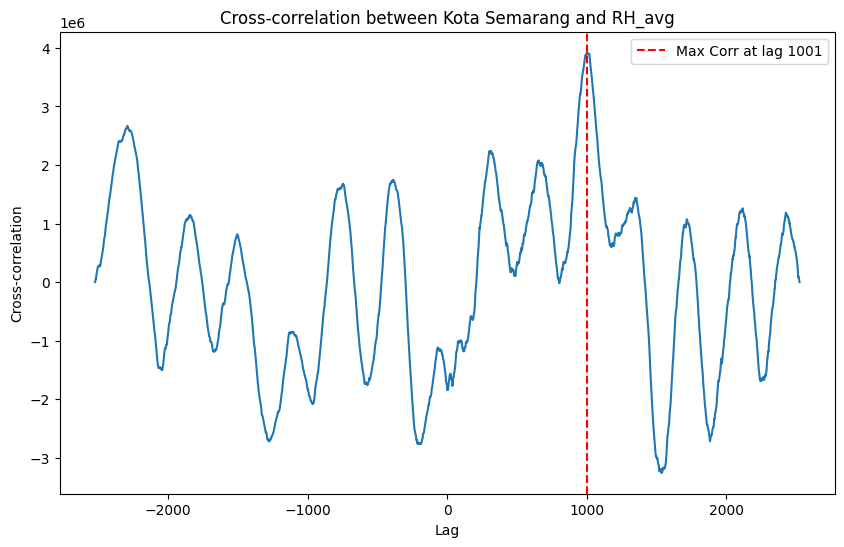

Harga beras: Kota Semarang - Satuan: RR
	 Cross-correlation maksimum: 2575660.823367473 pada lag 2117


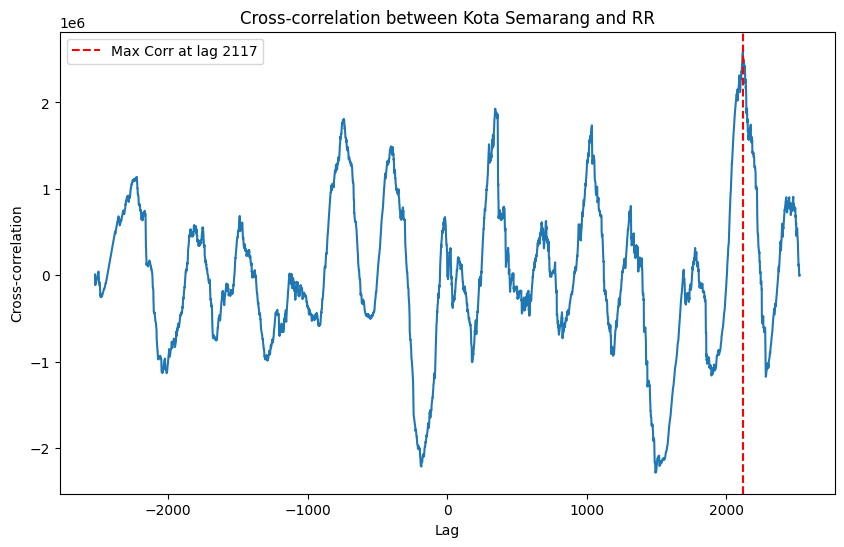

Harga beras: Kota Semarang - Satuan: ss
	 Cross-correlation maksimum: 1054132.3446193244 pada lag 1500


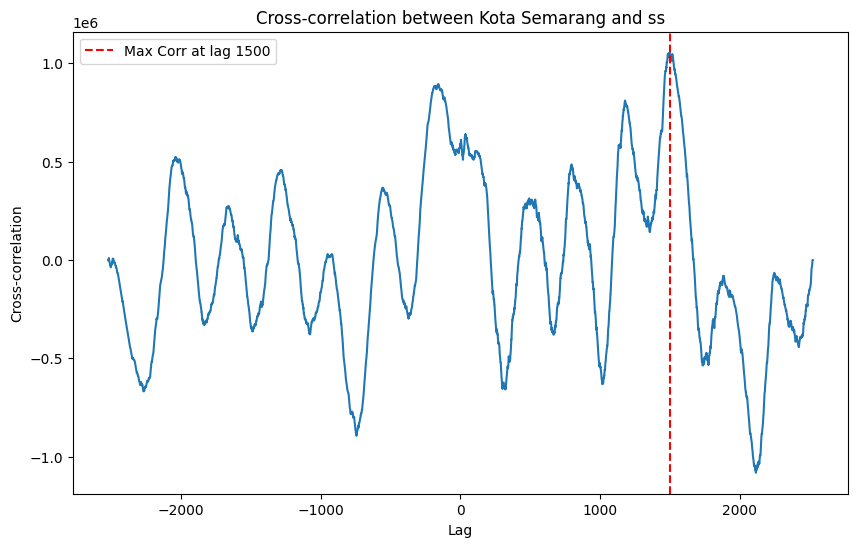

Harga beras: Kota Semarang - Satuan: ff_x
	 Cross-correlation maksimum: 8385781.371469214 pada lag 2284


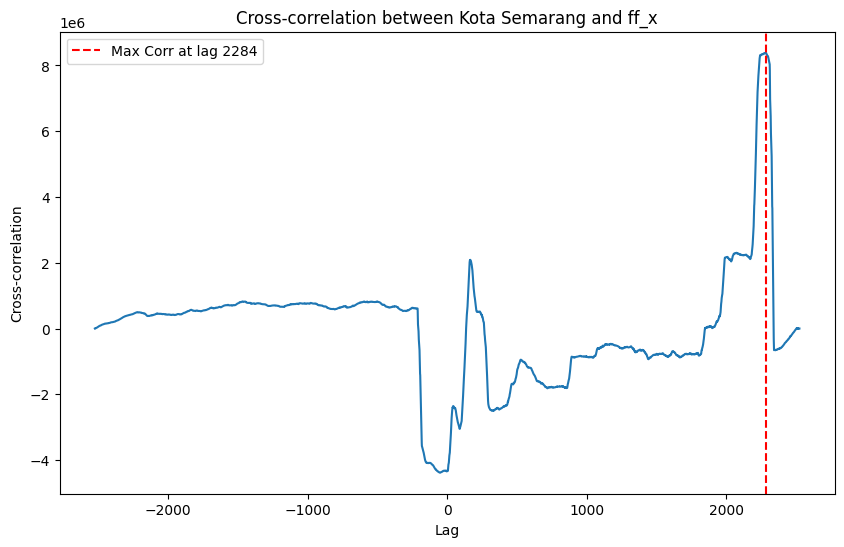

Harga beras: Kota Semarang - Satuan: ff_avg
	 Cross-correlation maksimum: 376039.6438204161 pada lag 2086


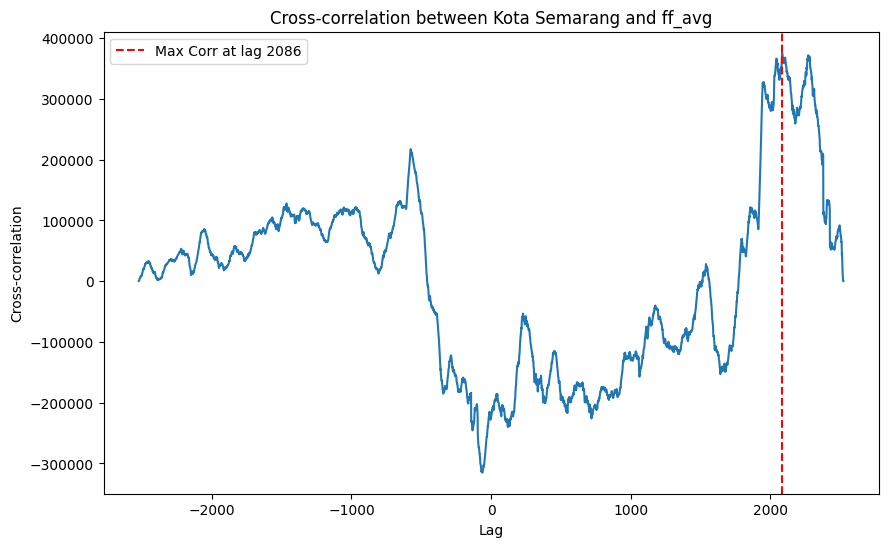

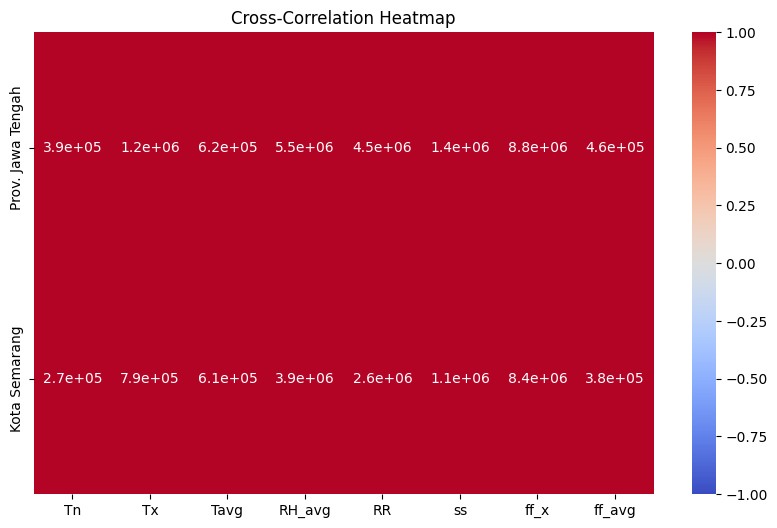

In [ ]:
# Membuat matriks untuk menyimpan hasil cross-correlation
correlation_matrix = pd.DataFrame(index=df_beras_cols, columns=df_iklim_cols, dtype=float)

# Menghitung cross-correlation antara dua time series
for beras in df_beras_cols:
    for iklim in df_iklim_cols:
        print(f"Harga beras: {beras} - Satuan: {iklim}")

        # Normalisasi data sebelum cross-correlation
        series1 = df_beras[beras] - np.mean(df_beras[beras])
        series2 = df_iklim[iklim] - np.mean(df_iklim[iklim])

        # Menghitung cross-correlation
        cross_corr = np.correlate(series1, series2, mode='full')
        lags = np.arange(-len(series1) + 1, len(series1))

        # Mengambil nilai cross-correlation maksimum
        max_corr = cross_corr.max()
        max_corr_index = np.argmax(cross_corr) - len(series1) + 1  # Menyesuaikan indeks lag

        print(f'\t Cross-correlation maksimum: {max_corr} pada lag {max_corr_index}')
        correlation_matrix.loc[beras, iklim] = max_corr

        # Plot garis cross-correlation untuk setiap iterasi
        plt.figure(figsize=(10, 6))
        plt.plot(lags, cross_corr)
        plt.axvline(x=max_corr_index, color='r', linestyle='--', label=f'Max Corr at lag {max_corr_index}')
        plt.xlabel('Lag')
        plt.ylabel('Cross-correlation')
        plt.title(f'Cross-correlation between {beras} and {iklim}')
        plt.legend()
        plt.show()

# Plotting Cross-Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cross-Correlation Heatmap')
plt.show()

Harga beras: Prov. Jawa Tengah - Satuan: Tn
	 Cross-correlation maksimum: 390353.292904685 pada lag 1106
	 Cross-correlation minimum: -452579.84093945933 pada lag 1543


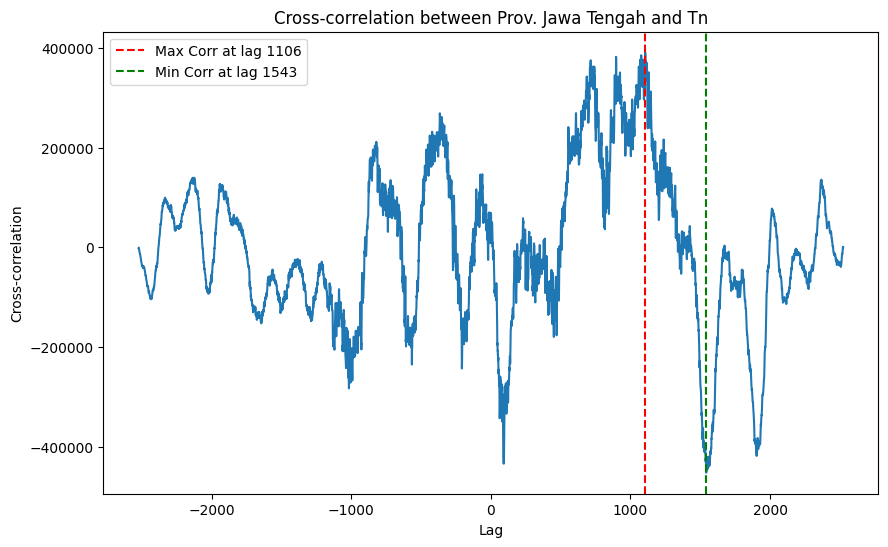

Harga beras: Prov. Jawa Tengah - Satuan: Tx
	 Cross-correlation maksimum: 1228286.1364784278 pada lag -205
	 Cross-correlation minimum: -878287.5159531231 pada lag 998


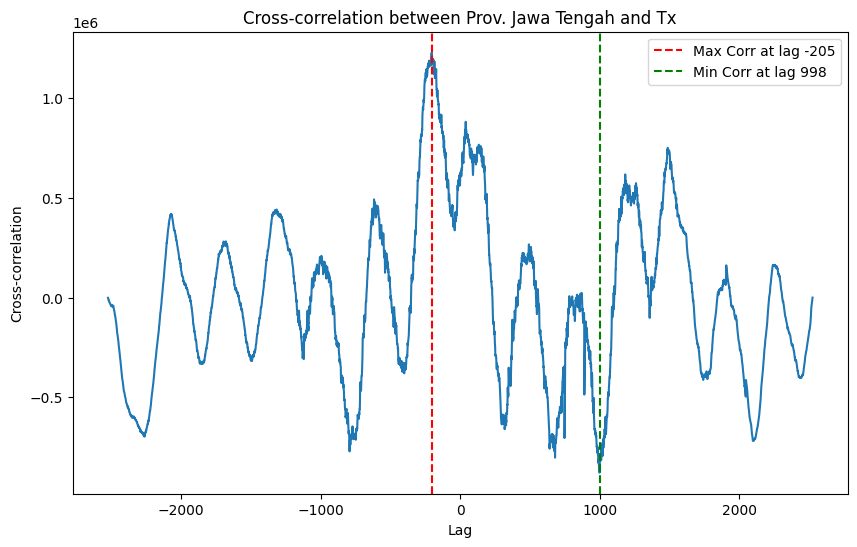

Harga beras: Prov. Jawa Tengah - Satuan: Tavg
	 Cross-correlation maksimum: 622563.1132785805 pada lag -255
	 Cross-correlation minimum: -878287.5159531231 pada lag 2096


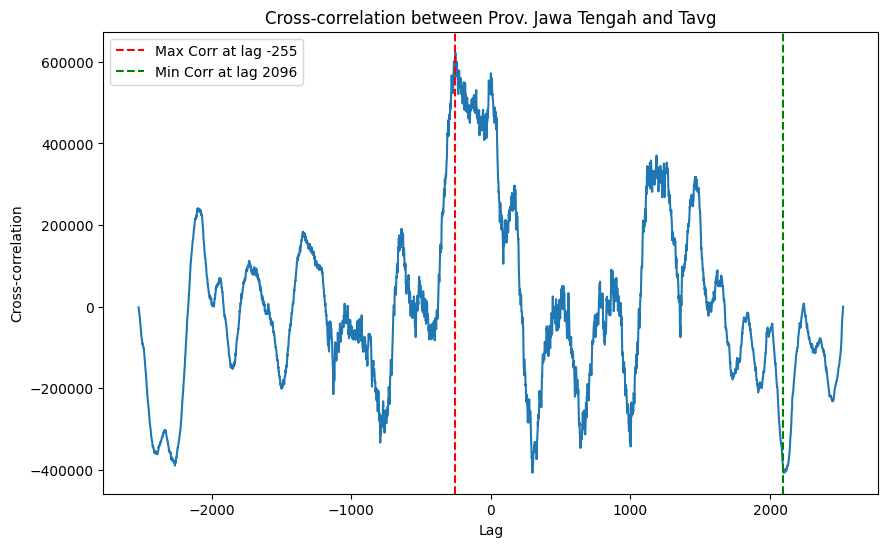

Harga beras: Prov. Jawa Tengah - Satuan: RH_avg
	 Cross-correlation maksimum: 5545776.41835049 pada lag 1013
	 Cross-correlation minimum: -4945222.289034752 pada lag -219


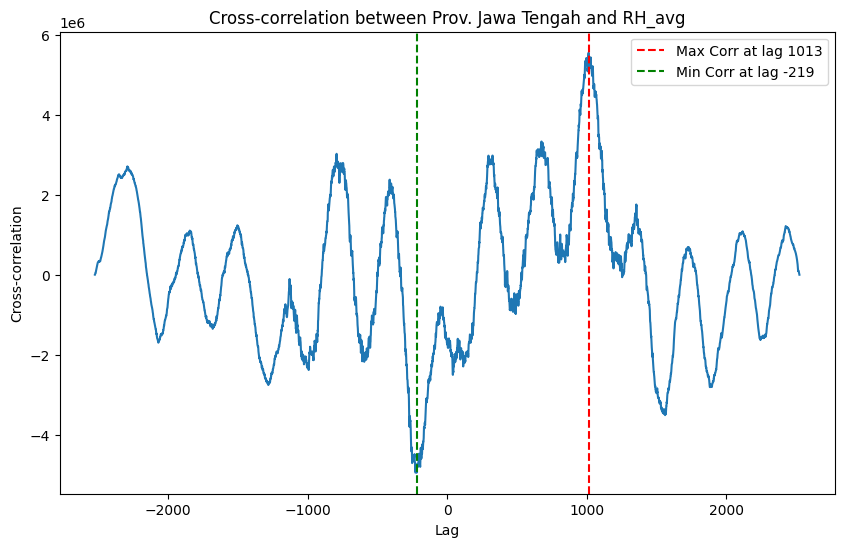

Harga beras: Prov. Jawa Tengah - Satuan: RR
	 Cross-correlation maksimum: 4465857.8036177205 pada lag -794
	 Cross-correlation minimum: -4945222.289034752 pada lag -184


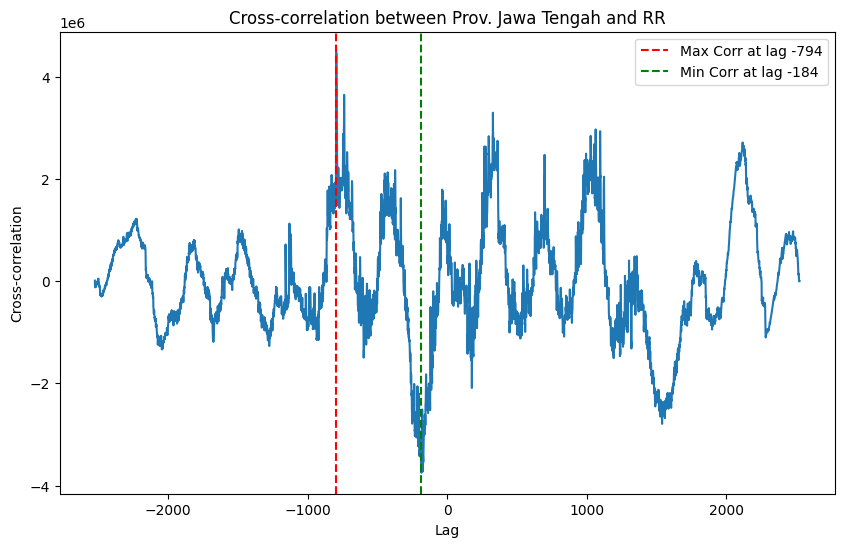

Harga beras: Prov. Jawa Tengah - Satuan: ss
	 Cross-correlation maksimum: 1431280.7492804423 pada lag -194
	 Cross-correlation minimum: -4945222.289034752 pada lag -758


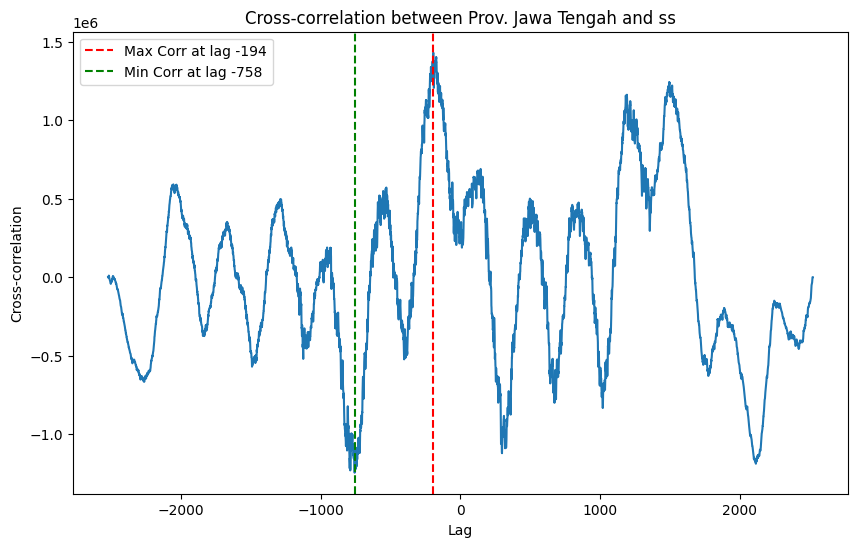

Harga beras: Prov. Jawa Tengah - Satuan: ff_x
	 Cross-correlation maksimum: 8771027.402768156 pada lag 2282
	 Cross-correlation minimum: -4945222.289034752 pada lag -137


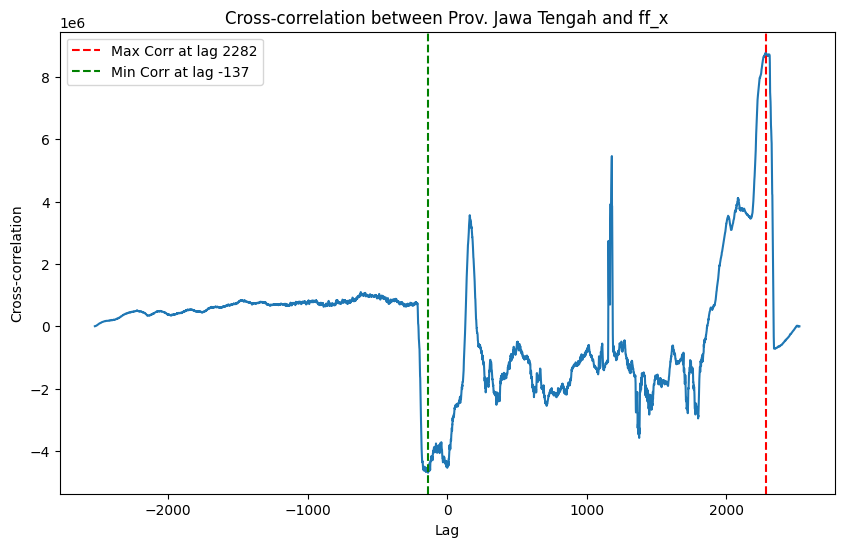

Harga beras: Prov. Jawa Tengah - Satuan: ff_avg
	 Cross-correlation maksimum: 463160.6949214942 pada lag 2044
	 Cross-correlation minimum: -4945222.289034752 pada lag -54


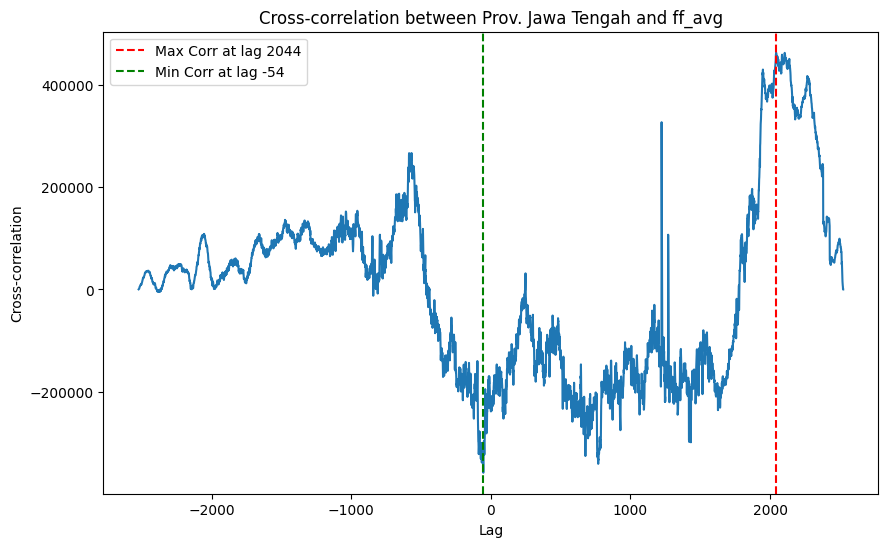

Harga beras: Kota Semarang - Satuan: Tn
	 Cross-correlation maksimum: 266629.9553283261 pada lag 914
	 Cross-correlation minimum: -4945222.289034752 pada lag 1544


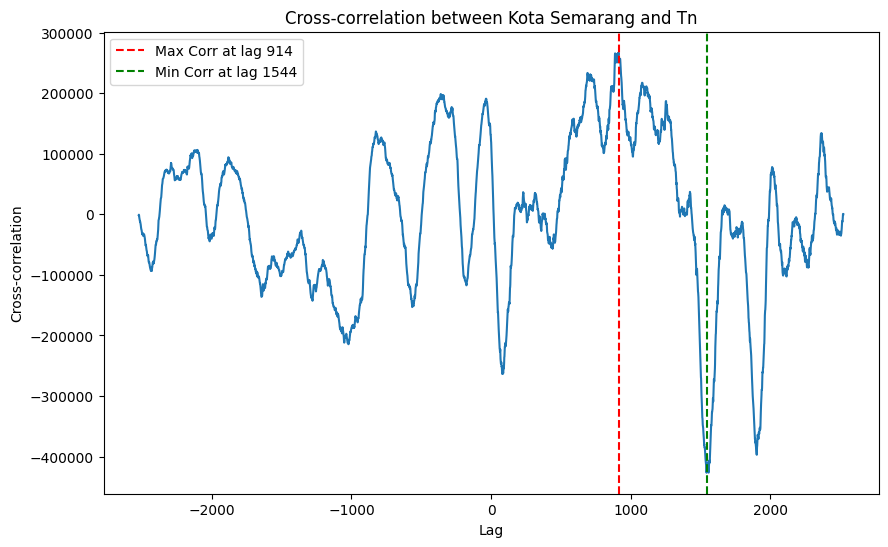

Harga beras: Kota Semarang - Satuan: Tx
	 Cross-correlation maksimum: 793214.8047401466 pada lag -210
	 Cross-correlation minimum: -4945222.289034752 pada lag 2097


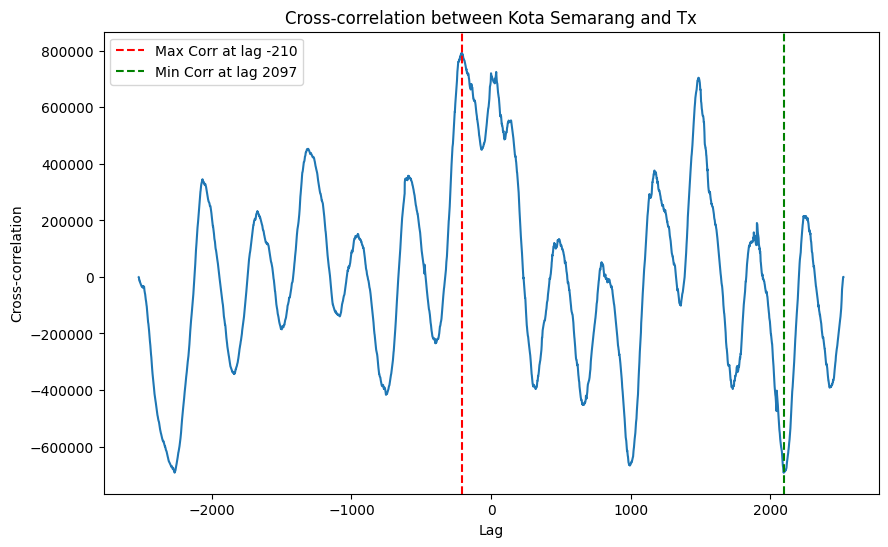

Harga beras: Kota Semarang - Satuan: Tavg
	 Cross-correlation maksimum: 609591.4339364971 pada lag -7
	 Cross-correlation minimum: -4945222.289034752 pada lag 2096


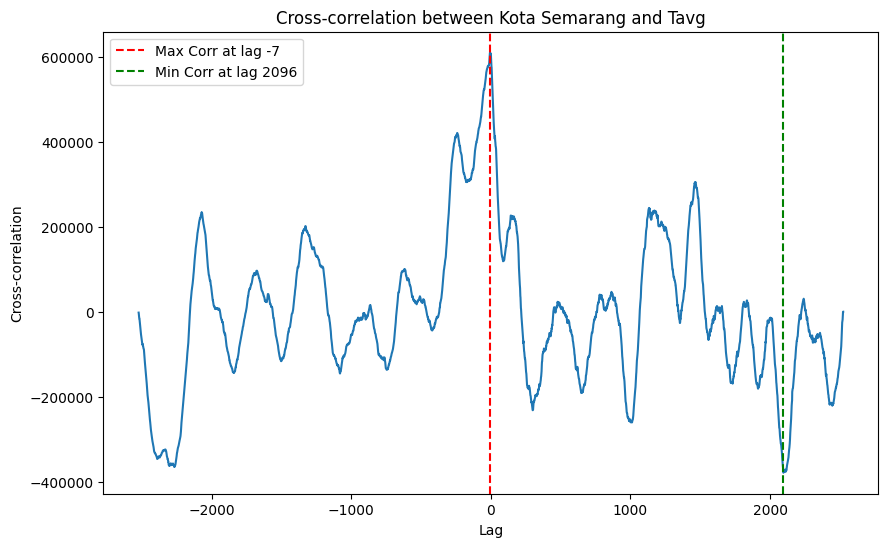

Harga beras: Kota Semarang - Satuan: RH_avg
	 Cross-correlation maksimum: 3918879.340417664 pada lag 1001
	 Cross-correlation minimum: -4945222.289034752 pada lag 1537


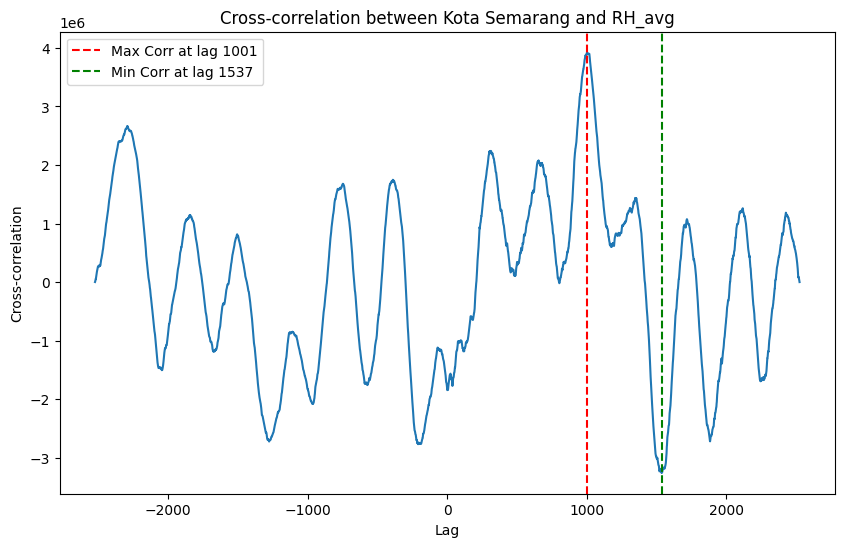

Harga beras: Kota Semarang - Satuan: RR
	 Cross-correlation maksimum: 2575660.823367473 pada lag 2117
	 Cross-correlation minimum: -4945222.289034752 pada lag 1493


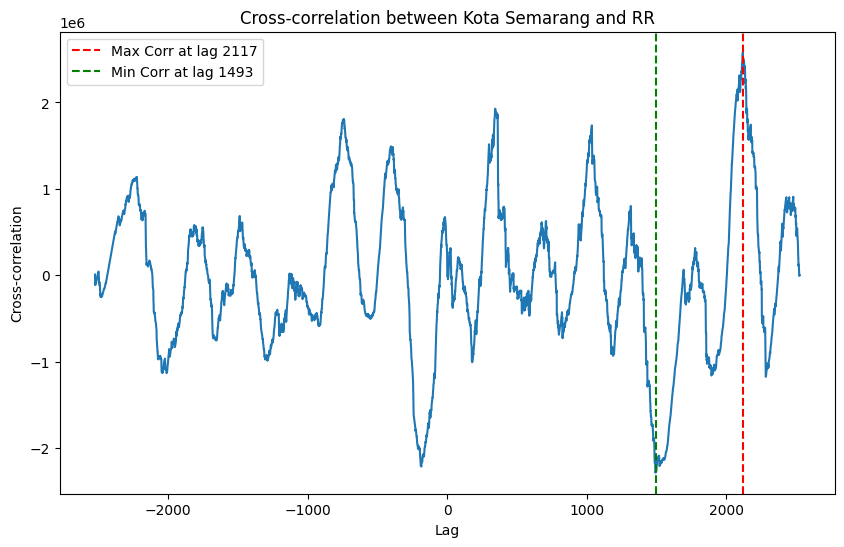

Harga beras: Kota Semarang - Satuan: ss
	 Cross-correlation maksimum: 1054132.3446193244 pada lag 1500
	 Cross-correlation minimum: -4945222.289034752 pada lag 2117


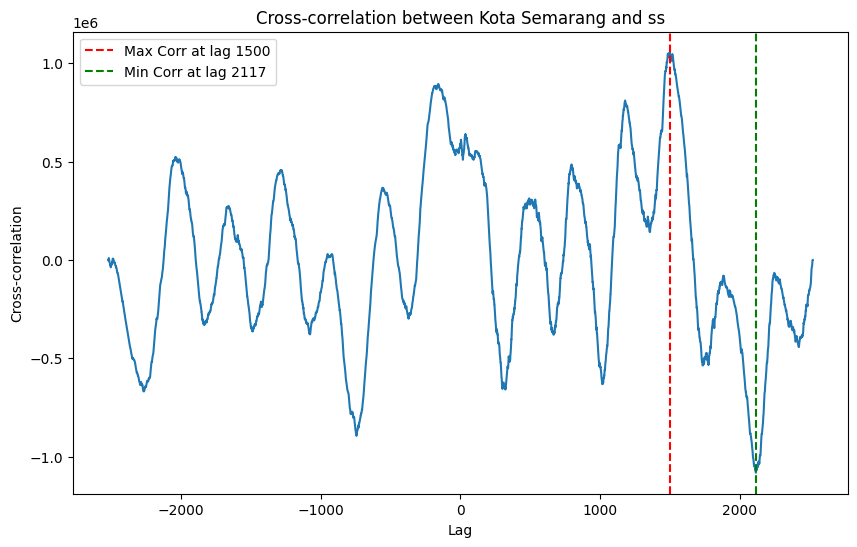

Harga beras: Kota Semarang - Satuan: ff_x
	 Cross-correlation maksimum: 8385781.371469214 pada lag 2284
	 Cross-correlation minimum: -4945222.289034752 pada lag -51


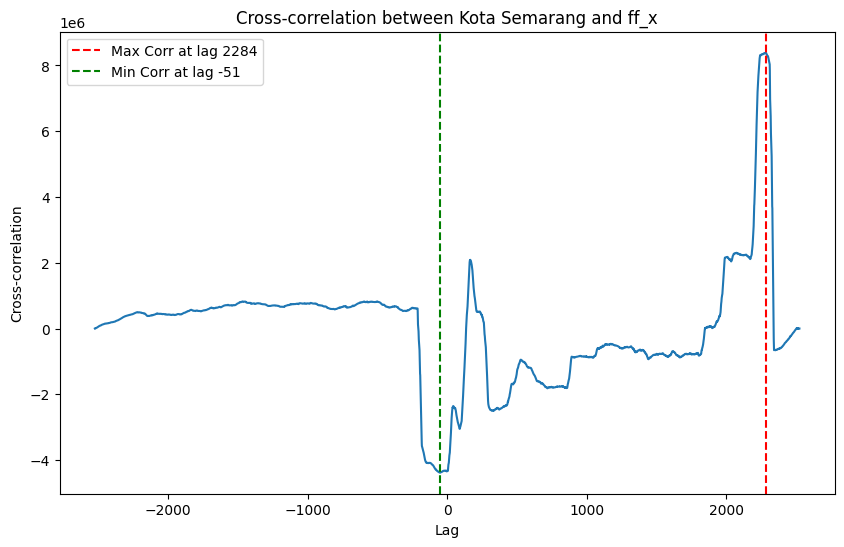

Harga beras: Kota Semarang - Satuan: ff_avg
	 Cross-correlation maksimum: 376039.6438204161 pada lag 2086
	 Cross-correlation minimum: -4945222.289034752 pada lag -63


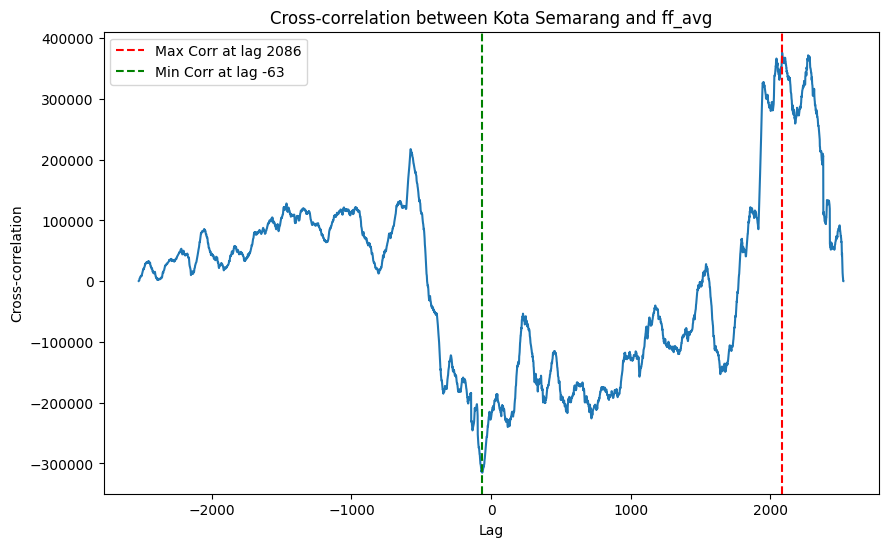

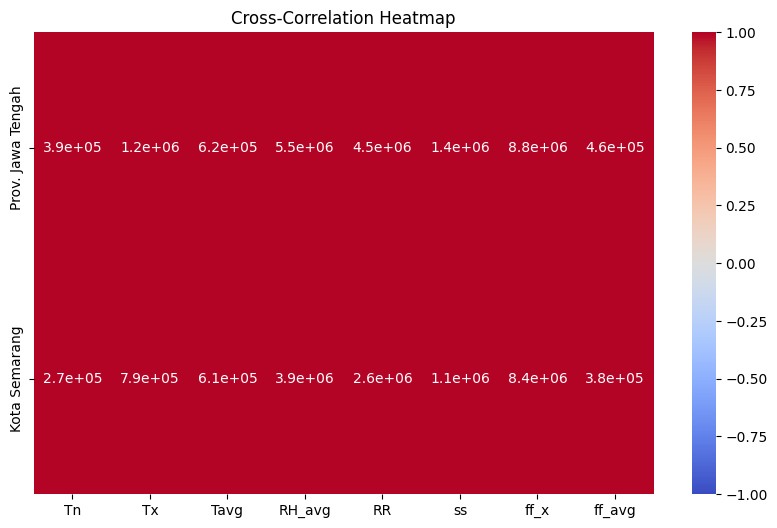

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat matriks untuk menyimpan hasil cross-correlation
correlation_matrix = pd.DataFrame(index=df_beras_cols, columns=df_iklim_cols, dtype=float)
min_corr = 1  # Initial value for minimum cross-correlation

# Menghitung cross-correlation antara dua time series
for beras in df_beras_cols:
    for iklim in df_iklim_cols:
        print(f"Harga beras: {beras} - Satuan: {iklim}")

        # Normalisasi data sebelum cross-correlation
        series1 = df_beras[beras] - np.mean(df_beras[beras])
        series2 = df_iklim[iklim] - np.mean(df_iklim[iklim])

        # Menghitung cross-correlation
        cross_corr = np.correlate(series1, series2, mode='full')
        lags = np.arange(-len(series1) + 1, len(series1))

        # Mengambil nilai cross-correlation maksimum
        max_corr = cross_corr.max()
        max_corr_index = np.argmax(cross_corr) - len(series1) + 1  # Menyesuaikan indeks lag

        # Mengambil nilai cross-correlation minimum
        min_corr = min(min_corr, cross_corr.min())
        min_corr_index = np.argmin(cross_corr) - len(series1) + 1  # Menyesuaikan indeks lag

        print(f'\t Cross-correlation maksimum: {max_corr} pada lag {max_corr_index}')
        print(f'\t Cross-correlation minimum: {min_corr} pada lag {min_corr_index}')
        correlation_matrix.loc[beras, iklim] = max_corr

        # Plot garis cross-correlation untuk setiap iterasi
        plt.figure(figsize=(10, 6))
        plt.plot(lags, cross_corr)
        plt.axvline(x=max_corr_index, color='r', linestyle='--', label=f'Max Corr at lag {max_corr_index}')
        plt.axvline(x=min_corr_index, color='g', linestyle='--', label=f'Min Corr at lag {min_corr_index}')
        plt.xlabel('Lag')
        plt.ylabel('Cross-correlation')
        plt.title(f'Cross-correlation between {beras} and {iklim}')
        plt.legend()
        plt.show()

# Plotting Cross-Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cross-Correlation Heatmap')
plt.show()


# Autocorrelation

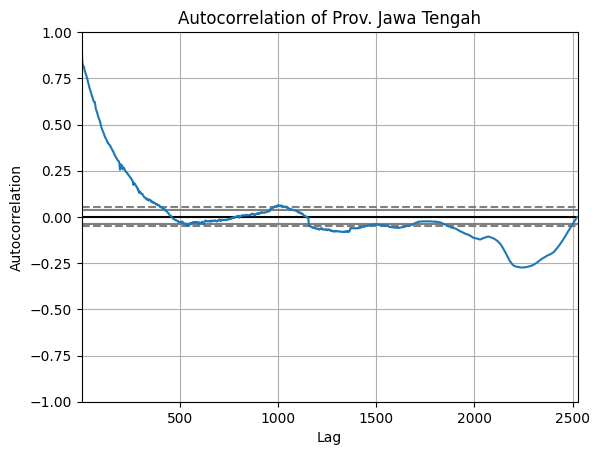

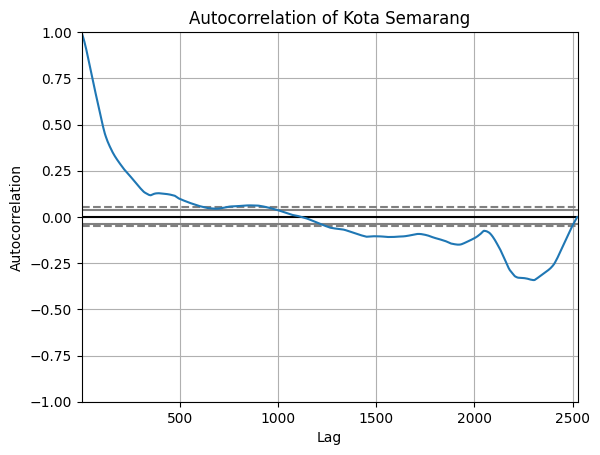

In [ ]:
from pandas.plotting import autocorrelation_plot

for beras in df_beras_cols:
  autocorrelation_plot(df_beras[beras])
  plt.title(f'Autocorrelation of {beras}')
  plt.show()

Tn


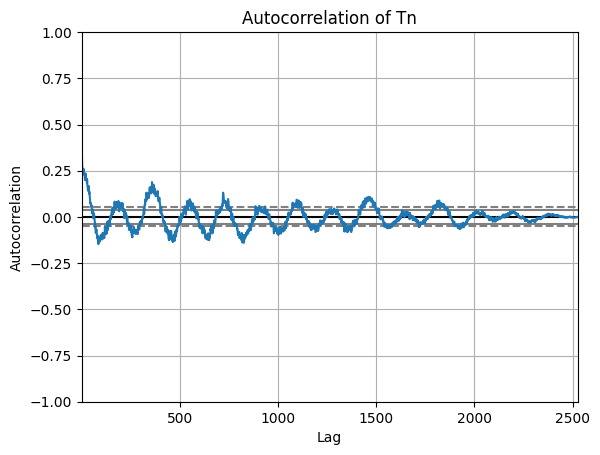

Tx


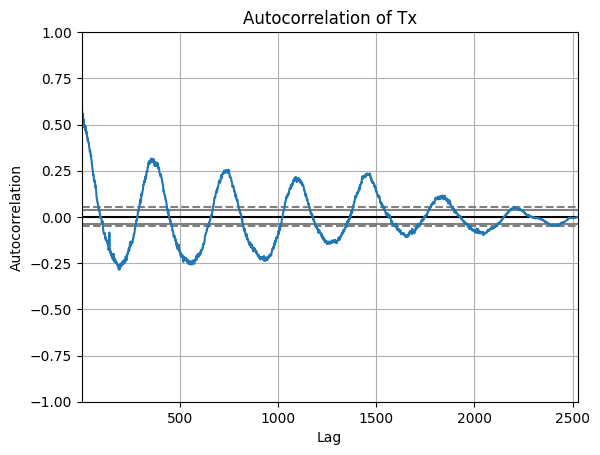

Tavg


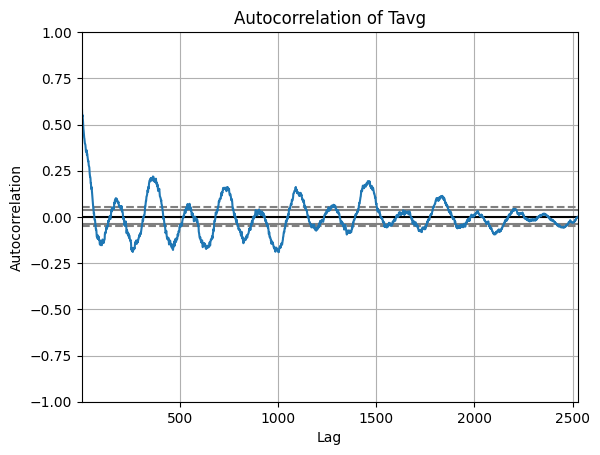

RH_avg


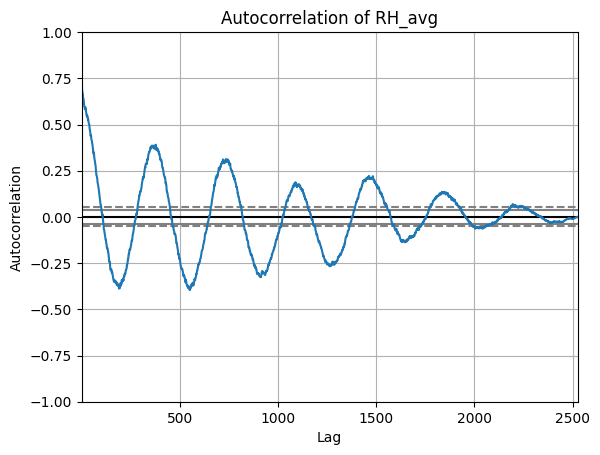

RR


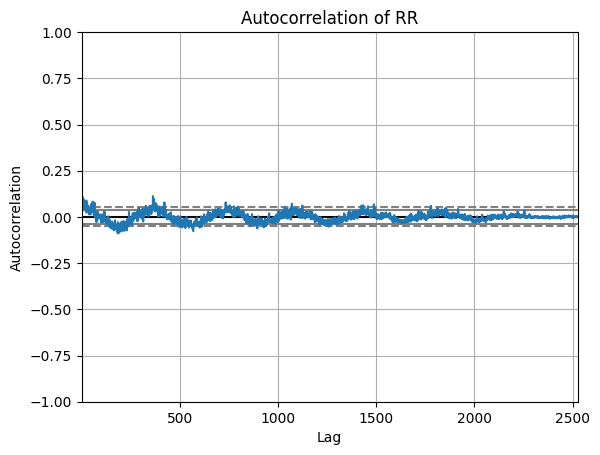

ss


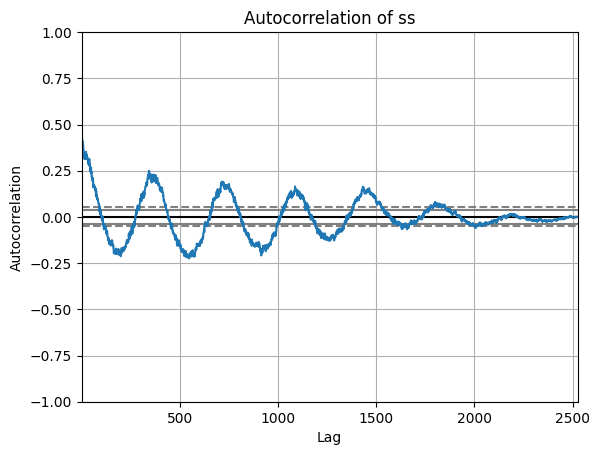

ff_x


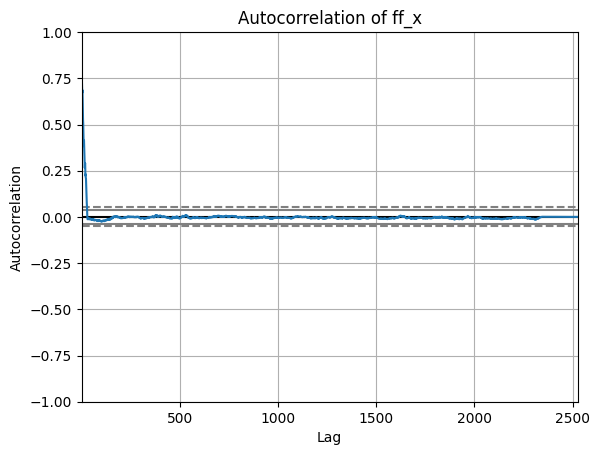

ff_avg


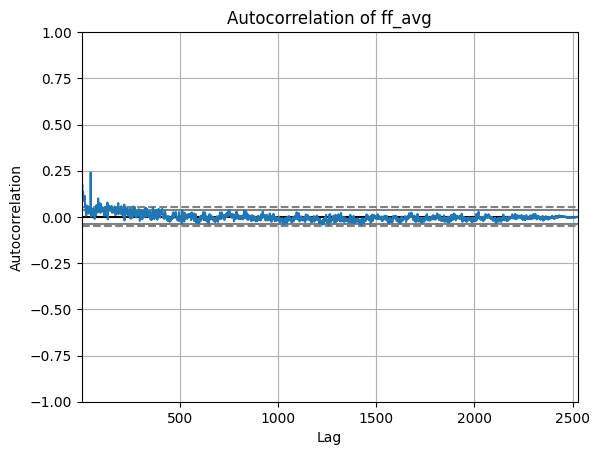

In [ ]:
for iklim in df_iklim_cols:
  print(iklim)
  df_target = df_iklim[iklim]
  autocorrelation_plot(df_target)
  plt.title(f'Autocorrelation of {iklim}')
  plt.show()